In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
######################################################################################
# Reading Data
######################################################################################
# Reading the CSV file into a DataFrame
df = pd.read_csv("../0000_Data/01-raw/01-Ad.csv")

# Defining feature columns and target column
x_values = df.iloc[:, 3:5].values
y_values = df.iloc[:, -1].values    

In [3]:
######################################################################################
# Preprocessing 
######################################################################################
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.25, stratify=y_values, random_state=40)

# Sclaling Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# ===================================================================================
# Concept: random_state (Reproducibility Parameter)
# ===================================================================================
# Goal: Ensures the "random" processes (like data splitting or shuffling)
#       produce the exact same result every time the code runs.
#
# Intuition:
# Think of it as a "pre-defined seed" for randomness. Without it, every
# execution is a new random result. With it (e.g., random_state=42),
# the randomness is locked in, making experiments reproducible.
#
# Importance:
# Crucial for debugging and comparing different models fairly, because
# the input data remains identical across runs.
# ===================================================================================

In [4]:
######################################################################################
# Building the Model
######################################################################################
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [5]:
######################################################################################
# Prediction and Evaluation
######################################################################################
# Predicting the Test set results
y_pred = knn_model.predict(x_test)

In [6]:
# ===================================================================================
# Types of Evaluation Metrics in classification problems and regression problems:
# ===================================================================================

## in classification problems::
# 1. Accuracy
# 2. Confusion Matrix & Normalized Confusion Matrix
# 3. Recall (Sensitivity)
# 4. Precision (Positive Predictive Value)
# 5. Specificity (True Negative Rate)
# 6. F1-Score
# 7. AUC-ROC
# 8. Log Loss

## in regression problems::
# 1. Mean Absolute Error (MAE)
# 2. Mean Squared Error (MSE)
# 3. Root Mean Squared Error (RMSE)
# 4. R-Squared
# ===================================================================================

In [7]:
# 1 - Evaluating the Model with accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# ===================================================================================
# Concept: Predictions vs Actuals (y_pred & y_test)
# ===================================================================================
# - y_test: The "Ground Truth". The actual, correct labels for the test data.
# - y_pred: The "Model's Guess". Labels predicted by the model for the test data.
# Goal: Compare y_pred against y_test to evaluate model performance.
# ===================================================================================

# ===================================================================================
# Concept: Data Balance (Balanced vs Imbalanced)
# ===================================================================================
# - Balanced: Classes have roughly equal sample sizes.
# - Imbalanced: One class (Majority) dominates, while another (Minority) is rare.
# Context: Real-world data is rarely balanced (e.g., fraud is rare).
# ===================================================================================

# ===================================================================================
# Concept: The Problem with Accuracy
# ===================================================================================
# Issue: Accuracy = (Correct Predictions / Total Predictions).
# Hazard: On imbalanced data, a model can get high accuracy simply by 
#         predicting the majority class every time, failing to detect
#         the important minority class (e.g., diseases, fraud).
# ===================================================================================

Accuracy: 0.91


Confusion Matrix:
[[59  5]
 [ 4 32]]


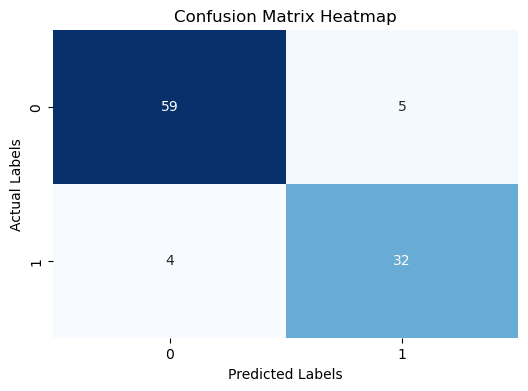

In [8]:
# 2 - Evaluating the Model with Confusion Matrix & Normalized Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# confusion matrix heatmap
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

# ===================================================================================
#                       Predicted Negative(0)   Predicted Positive(1)
# Actual Negative(0)       True Negative (TN)    False Positive (FP)
# Actual Positive(1)       False Negative (FN)   True Positive (TP)
# ===================================================================================

# ===================================================================================
# Concept: Confusion Matrix
# ===================================================================================
# Definition: A 2x2 table (for binary classification) summarizing the 
#             predictions of a model compared to actual ground truth.
#
# Key Components:
# - TN (True Negative): Actually Neg, Predicted Neg (Correct)
# - TP (True Positive): Actually Pos, Predicted Pos (Correct)
# - FP (False Positive): Actually Neg, Predicted Pos (False Alarm - Type I Error)
# - FN (False Negative): Actually Pos, Predicted Neg (Missed Detection - Type II Error)
#
# Intuition:
# It reveals not just IF the model is wrong, but HOW it is wrong. It is essential
# for imbalanced data, whereas Accuracy alone hides critical errors.
# ===================================================================================

Normalized Confusion Matrix:
[[0.921875   0.078125  ]
 [0.11111111 0.88888889]]


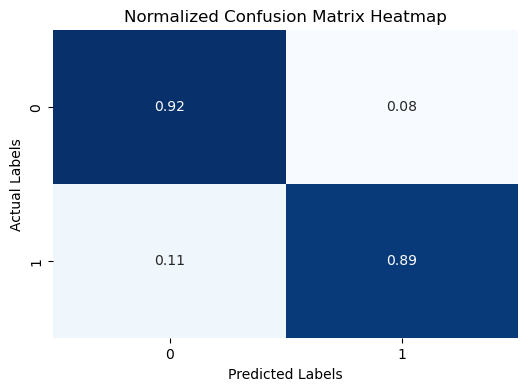

In [9]:
# 2 - Evaluating the Model with Normalized Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')
print("Normalized Confusion Matrix:")
print(cm_normalized)

# Normalized confusion matrix heatmap
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")  
plt.ylabel("Actual Labels")
plt.title("Normalized Confusion Matrix Heatmap")
plt.show()

# ===================================================================================
# Concept: Normalized Confusion Matrix
# ===================================================================================
# Definition: A confusion matrix where values are converted from absolute counts
#             to proportions (percentages) of each class, usually by row
#             (actual labels).
#
# Intuition:
# It shows the "rate" of success/failure instead of the raw number.
#
# Importance:
# Crucial for comparing models across datasets of different sizes, and for
# clearly visualizing performance on imbalanced data where minority classes
# would otherwise be invisible in raw counts.
# ===================================================================================

In [10]:
# 3 - Evaluating the Model with Recall (Sensitivity)
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# ===================================================================================
# Concept: Recall (Sensitivity)
# ===================================================================================
# Definition: The proportion of actual positive cases that were correctly 
#             identified by the model. (TP / (TP + FN))
#
# Intuition:
# It measures the model's ability to "find" all relevant instances. 
# It focuses on minimizing "False Negatives" (missing a positive case).
#
# Use Case:
# Critical when missing a positive case is dangerous or costly.
# Examples: Cancer detection (missing a tumor), Fraud detection (missing a fraud).
#
# Limitation:
# Recall alone can be misleading. A model predicting "Positive" for everyone
# has 100% Recall, but is useless. It must be paired with Precision.
# ===================================================================================

Recall: 0.89


In [11]:
# 4 - Evaluating the Model with Precision(Positive Predictive Value)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# ===================================================================================
# Concept: Precision
# ===================================================================================
# Definition: The proportion of positive predictions that were actually correct.
#             (TP / (TP + FP))
#
# Intuition:
# It measures the model's reliability when it predicts a positive class.
# It focuses on minimizing "False Positives" (False Alarms).
#
# Use Case:
# Critical when a False Positive is costly or annoying.
# Examples: Spam filtering (not blocking important emails), Fraud detection
# (not blocking valid credit card transactions).
#
# Limitation:
# Precision alone can be misleading. A model that predicts "Positive" only once
# and gets it right has 100% Precision, but it misses everything else.
# It must be paired with Recall.
# ===================================================================================

Precision: 0.86


In [12]:
# 5 - Evaluating the Model with Specificity (True Negative Rate)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

# ===================================================================================
# Concept: Specificity
# ===================================================================================
# Goal: Measures how well the model identifies "Negative" cases (Healthy/Not Spam).
#
# Intuition:
# - High Specificity: The model is "strict" or "conservative"; it rarely 
#   mistakes a healthy person for a sick one. (Low False Positive rate).
# - Low Specificity: The model is "reckless"; it wrongly flags many healthy
#   cases as positive.
#
# Application:
# Critical when a "False Positive" is costly or dangerous.
# Example: Email filters (not wanting important emails in Spam) or medical
# tests where you don't want to panic healthy people.
# ===================================================================================

Specificity: 0.92


In [13]:
# 6 - Evaluating the Model with F1-Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

# ==============================================================================
# Concept: F1-Score
# ==============================================================================
# Definition: The harmonic mean of Precision and Recall.
#             Formula: 2 * (Precision * Recall) / (Precision + Recall)
#
# Intuition:
# - It balances the trade-off between Precision and Recall.
# - F1-Score is high ONLY if both Precision and Recall are high.
# - Penalizes extreme imbalances between the two metrics.
#
# Use Case:
# - Crucial for imbalanced datasets where accuracy is misleading.
# - Provides a single, robust metric to compare model performance.
# ==============================================================================

F1-Score: 0.88


AUC-ROC: 0.95


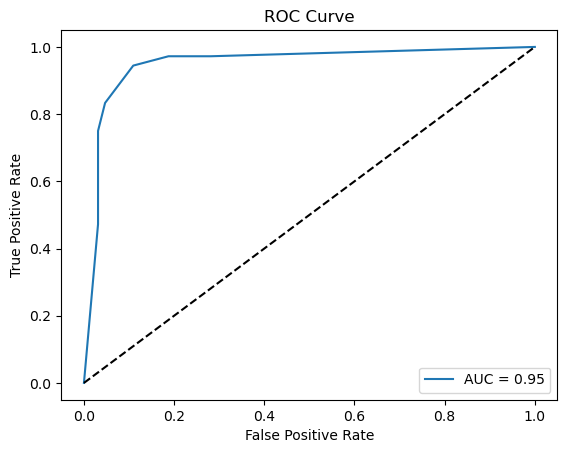

In [14]:
# 7 - Evaluating the Model with AUC-ROC
from sklearn.metrics import roc_auc_score
y_prob = knn_model.predict_proba(x_test)[:, 1]  # Get probabilities for the positive class
auc_roc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC: {auc_roc:.2f}")

# ROC Curve Plot
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc_roc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# ==============================================================================
# Concept: ROC Curve & AUC (Model Separability Power)
# ==============================================================================
# - ROC Curve: A plot of "True Positive Rate" (Recall) vs. "False Positive Rate".
#   It shows how the model performs at every possible decision threshold.
#
# - AUC Score: The area under that curve. 
#   - 1.0 = Perfect model (Zero errors).
#   - 0.5 = Random guessing (The model is useless/flipping a coin).
#
# -------------------------  Expert Pro-Tip -------------------------
# 1. SHAPE MATTERS: If your ROC curve has a "dent" or is very close to the 
#    diagonal line, your model is struggling to distinguish between classes.
#
# 2. THE DARK SIDE: ROC can be "Lying" to you! On highly imbalanced data 
#    (e.g., Credit Card Fraud), a model can have a high AUC (0.95+) just by 
#    predicting the majority class well, while failing miserably at catching 
#    the actual fraud. In such cases, ALWAYS check the "PR-Curve" (Precision-Recall) 
#    instead for the brutal truth.
# ----------------------------------------------------------------------

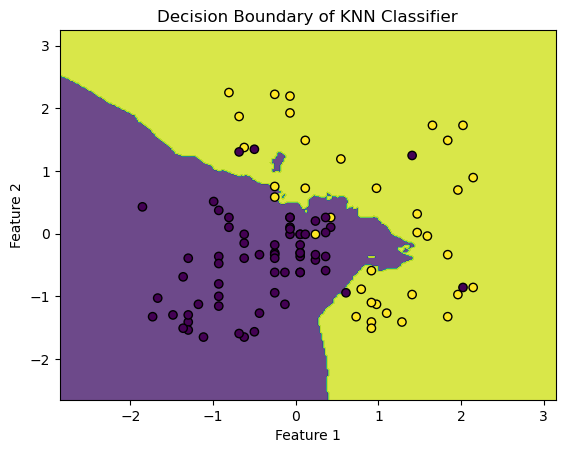

In [15]:
# Visualizing the model's Decision Boundary with matplotlib

# Create a meshgrid for visualization
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on the meshgrid points
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolors='black')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary of KNN Classifier")
plt.show()